170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5501 - accuracy: 0.4329 - val_loss: 1.3423 - val_accuracy: 0.5147
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1675 - accuracy: 0.5880 - val_loss: 1.0770 - val_accuracy: 0.6209
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0007 - accuracy: 0.6498 - val_loss: 1.0086 - val_accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9048 - accuracy: 0.6836 - val_loss: 0.9190 - val_accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8325 - accuracy: 0.7079 - val_loss: 0.9176 - val_accuracy: 0.6817
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7745 - accuracy: 0.7277 - val_loss: 0.8709 - val_accuracy: 0.6955
Epoch 7/10
1563/1563 [==============================] - 6

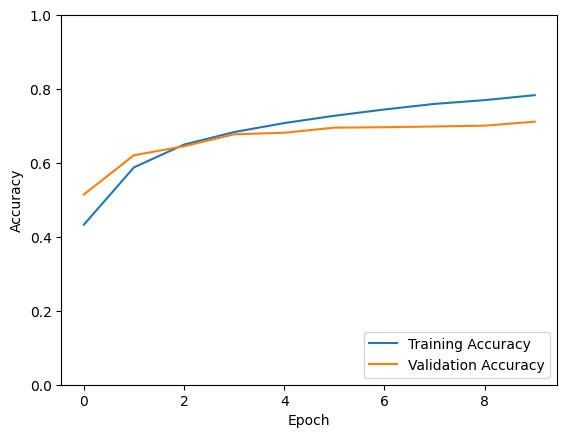

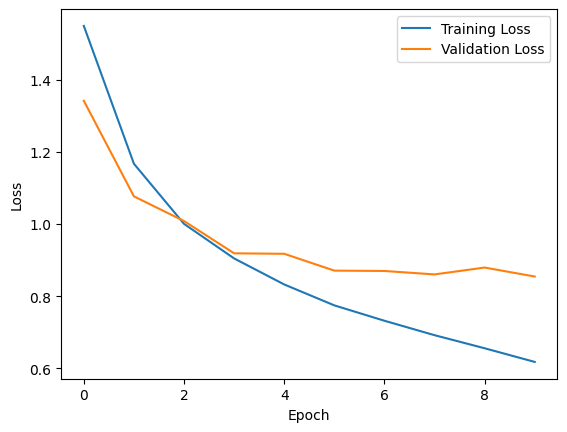

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset (e.g., CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
